In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('C:/dataset/abalone.csv')

In [3]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Rings 카테고리화
def categorize_rings(rings):
    if rings <= 8:
        return 0    # 어린 전복
    elif rings <= 12:
        return 1    # 중간 전복
    else:
        return 2    # 성숙 전복

In [5]:
df['Rings_category'] = df['Rings'].apply(categorize_rings)

In [6]:
# Sex 원-핫 인코딩
df = pd.get_dummies(df, columns=['Sex'])

In [7]:
# 특성과 타겟 분리
X = df.drop(['Rings', 'Rings_category', 'id'], axis=1)
y = df['Rings_category']

In [8]:
# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# LSTM 입력을 위한 reshape
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [10]:
# 타겟 원-핫 인코딩
y = to_categorical(y)

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# 2. LSTM 모델 구성
model = Sequential([
    # LSTM 레이어
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    
    LSTM(64),
    BatchNormalization(),
    Dropout(0.2),
    
    # Dense 레이어
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3개 클래스 분류
])

C:\Users\김경환\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# 3. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# 4. 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4848 - loss: 1.0889 - val_accuracy: 0.4753 - val_loss: 0.9996
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7067 - loss: 0.7075 - val_accuracy: 0.4753 - val_loss: 0.9689
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6939 - loss: 0.6904 - val_accuracy: 0.5949 - val_loss: 0.9040
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6913 - loss: 0.7001 - val_accuracy: 0.6248 - val_loss: 0.8512
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7100 - loss: 0.6841 - val_accuracy: 0.6517 - val_loss: 0.7619
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7094 - loss: 0.6725 - val_accuracy: 0.6771 - val_loss: 0.7065
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7029 - loss: 0.6600 - val_accuracy: 0.6801 - val_loss: 0.6933
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7104 - loss: 0.6479 - val_accuracy: 0.68

In [15]:
# 5. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {accuracy:.4f}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7032 - loss: 0.6530

Test accuracy: 0.7081


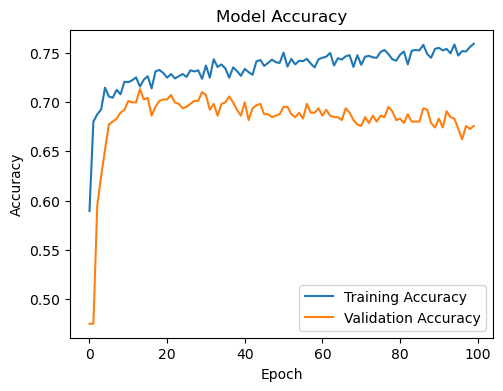

In [16]:
# 6. 학습 과정 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

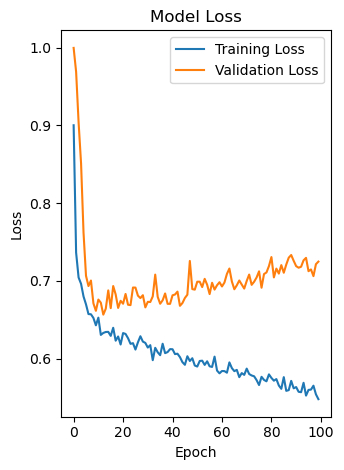

In [17]:
# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


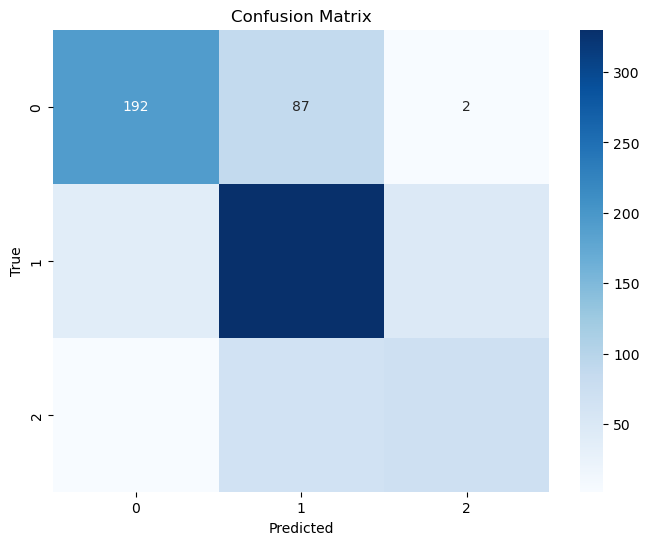

In [18]:
# 7. 혼동 행렬 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()